In [17]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [18]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

#this will cause text to be exported as 'true text' which can be edited in Adobe Illustrator
pl.rcParams['pdf.fonttype']=42
pl.rcParams['ps.fonttype']=42

In [19]:
pl.style.use('fabiostyle')

# needs to find the library of functions
sys.path.append('../../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [20]:
# NOTEBOOK_NAME = NOTEBOOK_NAME.split('/')[-1][:-6]
NOTEBOOK_NAME = 'lick_behavior_FIGURES'

In [21]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [22]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

In [23]:
def report_stats (array1, array2, sig_func=None,mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
        U = sig_func(array1, array2)[0]
        z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
        r = z/np.sqrt(loops*2)
        p = sig_func(array1, array2)[-1]
        print "U =",U,"p =",p*mcc,"r =",r
    if sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_ind(x, y)
        cohens_d = (np.mean(array1)-np.mean(array2))/np.sqrt((np.std(array1)**2+np.std(array2)**2)/2)
        p = sig_func(array1, array2)[-1]
        print sig_func(array1, array2),"d =", cohens_d, 'corrected p =',p*mcc

def report_stats_chance (array1, chance=0.5, sig_func=None,mcc=1):
    if sig_func is None:
        sig_func = lambda x: sstats.wilcoxon(x)
        subtracted = [x-chance for x in array1]
        U = sig_func(subtracted)[0]
        z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
        r = z/np.sqrt(loops*2)
        print sig_func(subtracted),"r =",r
    elif sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_1samp(x,y)
        cohens_d = (np.mean(array1)-chance)/np.std(array1)
        print sig_func(array1,chance),"d =",cohens_d

In [24]:
sessions ='pre', 'post'

In [25]:
#same for pre_rev and post_rev
pre_animals_vHPC  =  'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'
pre_animals_dHPC =  'dhpcg1','dhpcg20','dhpc24'
post_animals_vHPC ='c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93','91b','92b','93b'
tot_animals_pre = pre_animals_dHPC + pre_animals_vHPC
tot_animals_post = pre_animals_dHPC + post_animals_vHPC

In [26]:
for area in ['v','d','t']:
    for trial in ['CSm','reward','sh']:
        for day in ['pre','post','pre_rev','post_rev']:
            exec("%s_tc_%s_%s = []"%(day,area,trial))
            if area == 'v':
                if day == 'pre' or day == 'pre_rev':
                    for ani in pre_animals_vHPC:
                        exec("licks_tc=ut.load_variable('licks_tc','../%s/3odor_%s/notebooks/autorestore/preprocessing')"%(ani,day))
                        exec("%s=ut.load_variable('is_%st','../%s/3odor_%s/notebooks/autorestore/preprocessing')"%(trial,trial,ani,day))
                        exec("%s_tc_%s_%s.append(np.mean(licks_tc[%s]))"%(day,area,trial,trial))
                else:
                     for ani in post_animals_vHPC:
                        exec("licks_tc=ut.load_variable('licks_tc','../%s/3odor_%s/notebooks/autorestore/preprocessing')"%(ani,day))
                        exec("%s=ut.load_variable('is_%st','../%s/3odor_%s/notebooks/autorestore/preprocessing')"%(trial,trial,ani,day))
                        exec("%s_tc_%s_%s.append(np.mean(licks_tc[%s]))"%(day,area,trial,trial))
            elif area == 'd':
                for ani in pre_animals_dHPC:
                    exec("licks_tc=ut.load_variable('licks_tc','../%s/3odor_%s/notebooks/autorestore/preprocessing')"%(ani,day))
                    exec("%s=ut.load_variable('is_%st','../%s/3odor_%s/notebooks/autorestore/preprocessing')"%(trial,trial,ani,day))
                    exec("%s_tc_%s_%s.append(np.mean(licks_tc[%s]))"%(day,area,trial,trial))
            else:
                if day == 'pre' or day =='pre_rev':
                    for ani in tot_animals_pre:
                        exec("licks_tc=ut.load_variable('licks_tc','../%s/3odor_%s/notebooks/autorestore/preprocessing')"%(ani,day))
                        exec("%s=ut.load_variable('is_%st','../%s/3odor_%s/notebooks/autorestore/preprocessing')"%(trial,trial,ani,day))
                        exec("%s_tc_%s_%s.append(np.mean(licks_tc[%s]))"%(day,area,trial,trial))
                else:
                    for ani in tot_animals_post:
                        exec("licks_tc=ut.load_variable('licks_tc','../%s/3odor_%s/notebooks/autorestore/preprocessing')"%(ani,day))
                        exec("%s=ut.load_variable('is_%st','../%s/3odor_%s/notebooks/autorestore/preprocessing')"%(trial,trial,ani,day))
                        exec("%s_tc_%s_%s.append(np.mean(licks_tc[%s]))"%(day,area,trial,trial))
                             

In [27]:
for area in ['v','d','t']:
    for day in ['pre','post','pre_rev','post_rev']:
        exec("%s_di_%s = []"%(day,area))
        if area == 'v':
            if day == 'pre' or day =='pre_rev':
                for ani in pre_animals_vHPC:
                    exec("%s_di_%s.append(ut.load_variable('lick_di','../%s/3odor_%s/notebooks/autorestore/preprocessing'))"%(day,area,ani,day))
            else:
                for ani in post_animals_vHPC:
                    exec("%s_di_%s.append(ut.load_variable('lick_di','../%s/3odor_%s/notebooks/autorestore/preprocessing'))"%(day,area,ani,day))
        elif area == 'd':
            for ani in pre_animals_dHPC:
                exec("%s_di_%s.append(ut.load_variable('lick_di','../%s/3odor_%s/notebooks/autorestore/preprocessing'))"%(day,area,ani,day))
        else:
            if day == 'pre' or day =='pre_rev':
                for ani in tot_animals_pre:
                    exec("%s_di_%s.append(ut.load_variable('lick_di','../%s/3odor_%s/notebooks/autorestore/preprocessing'))"%(day,area,ani,day))
            else:
                for ani in tot_animals_post:
                    exec("%s_di_%s.append(ut.load_variable('lick_di','../%s/3odor_%s/notebooks/autorestore/preprocessing'))"%(day,area,ani,day))
            

In [28]:
from scipy.stats import sem
from matplotlib.lines import Line2D
def add_significance(ax, array1, array2, x1, x2, y, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y,)
    p = sig_func(array1, array2)[-1]
    print p
    sig_value = sig_func(array1, array2)[0]
    deltay = np.diff(ax.axis()[-2:])*ticksize
    line = Line2D([x1, x1, x2, x2], [y-deltay, y, y, y-deltay], lw=.5, color='k', clip_on=False)
    ax.add_line(line)
    ax.text(np.mean([x1, x2]), y+.2,
            'n.s.' if p > thresholds[0]/mcc else
            '*' if p > thresholds[1]/mcc else
            '**' if p > thresholds[2]/mcc else
            '***',
            ha='center', fontsize=5)
    return sig_value, p

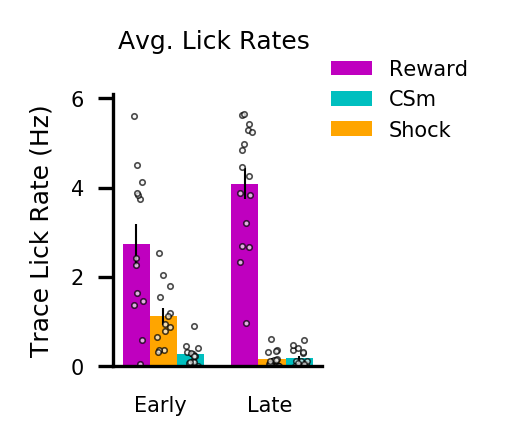

In [30]:
from matplotlib.patches import Patch
labels = ['Early','Late']
area = 't'
loops = len(pre_tc_t_CSm)

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

to_plot = ['pre','post']

dark_co = ('forestgreen','darkcyan','firebrick','lightgrey','dimgrey','goldenrod')
fig, ax = pl.subplots(figsize=(.9,1.2))
pvs=[]

for day,i in zip(to_plot,range(2)):
    if i ==0:
        exec("%s_tc_%s_CSm = [x/2 for x in %s_tc_%s_CSm]"%(day,area,day,area))
        exec("e = np.array(sstats.sem(%s_tc_%s_CSm))"%(day,area))
        exec("ax.bar(i + 2*width-width/2, np.mean(%s_tc_%s_CSm), width,color='c',yerr=e)"%(day,area))
        exec("ax.scatter(i+2*width-width/2+np.random.random(np.array(%s_tc_%s_CSm).size)*width/2-width/4.5,%s_tc_%s_CSm,\
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')"%(day,area,day,area))
        exec("%s_tc_%s_reward = [x/2 for x in %s_tc_%s_reward]"%(day,area,day,area))
        exec("l= np.array(sstats.sem(%s_tc_%s_reward))"%(day,area))
        exec("ax.bar(i - width/2,  np.mean(%s_tc_%s_reward), width,color='m',yerr=l)"%(day,area))
        exec("ax.scatter(i-width/2+np.random.random(np.array(%s_tc_%s_reward).size)*width/2-width/4.5,%s_tc_%s_reward,\
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')"%(day,area,day,area))
        exec("%s_tc_%s_sh = [x/2 for x in %s_tc_%s_sh]"%(day,area,day,area))
        exec("l= np.array(sstats.sem(%s_tc_%s_sh))"%(day,area))
        exec("ax.bar(i + width/2,  np.mean(%s_tc_%s_sh), width,color='orange',yerr=l)"%(day,area))
        exec("ax.scatter(i+width/2+np.random.random(np.array(%s_tc_%s_sh).size)*width/2-width/4.5,%s_tc_%s_sh,\
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')"%(day,area,day,area))
    else:
        exec("%s_tc_%s_CSm = [x/2 for x in %s_tc_%s_CSm]"%(day,area,day,area))
        exec("e = np.array(sstats.sem(%s_tc_%s_CSm))"%(day,area))
        exec("ax.bar(i + 2*width-width/2, np.mean(%s_tc_%s_CSm), width,color='c',yerr=e)"%(day,area))
        exec("ax.scatter(i+2*width-width/2+np.random.random(np.array(%s_tc_%s_CSm).size)*width/2-width/4.5,%s_tc_%s_CSm,\
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')"%(day,area,day,area))
        exec("%s_tc_%s_reward = [x/2 for x in %s_tc_%s_reward]"%(day,area,day,area))
        exec("l= np.array(sstats.sem(%s_tc_%s_reward))"%(day,area))
        exec("ax.bar(i - width/2,  np.mean(%s_tc_%s_reward), width,color='m',yerr=l)"%(day,area))
        exec("ax.scatter(i-width/2+np.random.random(np.array(%s_tc_%s_reward).size)*width/2-width/4.5,%s_tc_%s_reward,\
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')"%(day,area,day,area))
        exec("%s_tc_%s_sh = [x/2 for x in %s_tc_%s_sh]"%(day,area,day,area))
        exec("l= np.array(sstats.sem(%s_tc_%s_sh))"%(day,area))
        exec("ax.bar(i + width/2,  np.mean(%s_tc_%s_sh), width,color='orange',yerr=l)"%(day,area))
        exec("ax.scatter(i+width/2+np.random.random(np.array(%s_tc_%s_sh).size)*width/2-width/4.5,%s_tc_%s_sh,\
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')"%(day,area,day,area))
        

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Trace Lick Rate (Hz)',fontsize=6)
#ax.set_title('Decoding During CS')
ax.set_ylim(0,6.1)
x = [.1,1.1]
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='m'),Patch(facecolor='c'),Patch(facecolor='orange')],['Reward','CSm','Shock'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)

        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Avg. Lick Rates',y=1.06,fontsize=6)

fig.savefig('../figures/%s_3odor_all_mice_trace_lick_bars.pdf'%NOTEBOOK_NAME)

In [ ]:
from matplotlib.patches import Patch
labels = ['Early','Late']
area = 'd'

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

to_plot = ['pre','post']

dark_co = ('forestgreen','darkcyan','firebrick','lightgrey','dimgrey','goldenrod')
fig, ax = pl.subplots(figsize=(.6,1.2))
pvs=[]

for day,i in zip(to_plot,range(2)):
    if i ==0:
        exec("%s_tc_%s_CSm = [x/2 for x in %s_tc_%s_CSm]"%(day,area,day,area))
        exec("e = np.array(sstats.sem(%s_tc_%s_CSm))"%(day,area))
        exec("ax.bar(i - width/2, np.mean(%s_tc_%s_CSm), width,color='c',yerr=e)"%(day,area))
        exec("%s_tc_%s_reward = [x/2 for x in %s_tc_%s_reward]"%(day,area,day,area))
        exec("l= np.array(sstats.sem(%s_tc_%s_reward))"%(day,area))
        exec("ax.bar(i + width/2,  np.mean(%s_tc_%s_reward), width,color='m',yerr=l)"%(day,area))
    else:
        exec("%s_tc_%s_CSm = [x/2 for x in %s_tc_%s_CSm]"%(day,area,day,area))
        exec("e = np.array(sstats.sem(%s_tc_%s_CSm))"%(day,area))
        exec("ax.bar(i-.4 - width/2, np.mean(%s_tc_%s_CSm), width, color='c',yerr=e)"%(day,area))
        exec("%s_tc_%s_reward = [x/2 for x in %s_tc_%s_reward]"%(day,area,day,area))
        exec("l= np.array(sstats.sem(%s_tc_%s_reward))"%(day,area))
        exec("ax.bar(i-.4 + width/2,  np.mean(%s_tc_%s_reward), width,color='m',yerr=l)"%(day,area))
        
for day in to_plot:
    if day =='pre':
        exec("pvs.append(add_significance(ax, %s_tc_%s_CSm, %s_tc_%s_reward,-.12,0.12,4.9))"%(day,area,day,area))
    else:
        exec("pvs.append(add_significance(ax, %s_tc_%s_CSm, %s_tc_%s_reward,-.12+.6,0.12+.6,4.9))"%(day,area,day,area))
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Trace Lick Rate (Hz)',fontsize=6)
#ax.set_title('Decoding During CS')
ax.set_ylim(0,5)
x = [0,.65]
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='m'),Patch(facecolor='c')],['Reward','CSm'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)

        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Avg. Lick Rates dHPC',y=1.06,fontsize=6)

fig.savefig('../../../results/final-ish figures/%s_3odor_dorsal_mice_trace_lick_bars.pdf'%NOTEBOOK_NAME)

In [ ]:
from matplotlib.patches import Patch
labels = ['Early','Late']
area = 'v'

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

to_plot = ['pre','post']

dark_co = ('forestgreen','darkcyan','firebrick','lightgrey','dimgrey','goldenrod')
fig, ax = pl.subplots(figsize=(.6,1.2))
pvs=[]

for day,i in zip(to_plot,range(2)):
    if i ==0:
        exec("%s_tc_%s_CSm = [x/2 for x in %s_tc_%s_CSm]"%(day,area,day,area))
        exec("e = np.array(sstats.sem(%s_tc_%s_CSm))"%(day,area))
        exec("ax.bar(i - width/2, np.mean(%s_tc_%s_CSm), width,color='c',yerr=e)"%(day,area))
        exec("%s_tc_%s_reward = [x/2 for x in %s_tc_%s_reward]"%(day,area,day,area))
        exec("l= np.array(sstats.sem(%s_tc_%s_reward))"%(day,area))
        exec("ax.bar(i + width/2,  np.mean(%s_tc_%s_reward), width,color='m',yerr=l)"%(day,area))
    else:
        exec("%s_tc_%s_CSm = [x/2 for x in %s_tc_%s_CSm]"%(day,area,day,area))
        exec("e = np.array(sstats.sem(%s_tc_%s_CSm))"%(day,area))
        exec("ax.bar(i-.4 - width/2, np.mean(%s_tc_%s_CSm), width, color='c',yerr=e)"%(day,area))
        exec("%s_tc_%s_reward = [x/2 for x in %s_tc_%s_reward]"%(day,area,day,area))
        exec("l= np.array(sstats.sem(%s_tc_%s_reward))"%(day,area))
        exec("ax.bar(i-.4 + width/2,  np.mean(%s_tc_%s_reward), width,color='m',yerr=l)"%(day,area))
        
for day in to_plot:
    if day =='pre':
        exec("pvs.append(add_significance(ax, %s_tc_%s_CSm, %s_tc_%s_reward,-.12,0.12,4.9))"%(day,area,day,area))
    else:
        exec("pvs.append(add_significance(ax, %s_tc_%s_CSm, %s_tc_%s_reward,-.12+.6,0.12+.6,4.9))"%(day,area,day,area))
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Trace Lick Rate (Hz)',fontsize=6)
#ax.set_title('Decoding During CS')
ax.set_ylim(0,5)
x = [0,.65]
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='m'),Patch(facecolor='c')],['Reward','CSm'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)

        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Avg. Lick Rates vHPC',y=1.06,fontsize=6)

fig.savefig('../../../results/final-ish figures/%s_3odor_ventral_mice_trace_lick_bars.pdf'%NOTEBOOK_NAME)

In [ ]:
from matplotlib.patches import Patch
labels = ['Early\nRev','Late\nRev']
area = 't'

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

to_plot = ['pre_rev','post_rev']

dark_co = ('forestgreen','darkcyan','firebrick','lightgrey','dimgrey','goldenrod')
fig, ax = pl.subplots(figsize=(.9,1.2))
pvs=[]

for day,i in zip(to_plot,range(2)):
    if i ==0:
        exec("%s_tc_%s_CSm = [x/2 for x in %s_tc_%s_CSm]"%(day,area,day,area))
        exec("e = np.array(sstats.sem(%s_tc_%s_CSm))"%(day,area))
        exec("ax.bar(i + 2*width-width/2, np.mean(%s_tc_%s_CSm), width,color='c',yerr=e)"%(day,area))
        exec("ax.scatter(i+2*width-width/2+np.random.random(np.array(%s_tc_%s_CSm).size)*width/2-width/4.5,%s_tc_%s_CSm,\
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')"%(day,area,day,area))
        exec("%s_tc_%s_reward = [x/2 for x in %s_tc_%s_reward]"%(day,area,day,area))
        exec("l= np.array(sstats.sem(%s_tc_%s_reward))"%(day,area))
        exec("ax.bar(i - width/2,  np.mean(%s_tc_%s_reward), width,color='m',yerr=l)"%(day,area))
        exec("ax.scatter(i-width/2+np.random.random(np.array(%s_tc_%s_reward).size)*width/2-width/4.5,%s_tc_%s_reward,\
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')"%(day,area,day,area))
        exec("%s_tc_%s_sh = [x/2 for x in %s_tc_%s_sh]"%(day,area,day,area))
        exec("l= np.array(sstats.sem(%s_tc_%s_sh))"%(day,area))
        exec("ax.bar(i + width/2,  np.mean(%s_tc_%s_sh), width,color='orange',yerr=l)"%(day,area))
        exec("ax.scatter(i+width/2+np.random.random(np.array(%s_tc_%s_sh).size)*width/2-width/4.5,%s_tc_%s_sh,\
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')"%(day,area,day,area))
    else:
        exec("%s_tc_%s_CSm = [x/2 for x in %s_tc_%s_CSm]"%(day,area,day,area))
        exec("e = np.array(sstats.sem(%s_tc_%s_CSm))"%(day,area))
        exec("ax.bar(i + 2*width-width/2, np.mean(%s_tc_%s_CSm), width,color='c',yerr=e)"%(day,area))
        exec("ax.scatter(i+2*width-width/2+np.random.random(np.array(%s_tc_%s_CSm).size)*width/2-width/4.5,%s_tc_%s_CSm,\
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')"%(day,area,day,area))
        exec("%s_tc_%s_reward = [x/2 for x in %s_tc_%s_reward]"%(day,area,day,area))
        exec("l= np.array(sstats.sem(%s_tc_%s_reward))"%(day,area))
        exec("ax.bar(i - width/2,  np.mean(%s_tc_%s_reward), width,color='m',yerr=l)"%(day,area))
        exec("ax.scatter(i-width/2+np.random.random(np.array(%s_tc_%s_reward).size)*width/2-width/4.5,%s_tc_%s_reward,\
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')"%(day,area,day,area))
        exec("%s_tc_%s_sh = [x/2 for x in %s_tc_%s_sh]"%(day,area,day,area))
        exec("l= np.array(sstats.sem(%s_tc_%s_sh))"%(day,area))
        exec("ax.bar(i + width/2,  np.mean(%s_tc_%s_sh), width,color='orange',yerr=l)"%(day,area))
        exec("ax.scatter(i+width/2+np.random.random(np.array(%s_tc_%s_sh).size)*width/2-width/4.5,%s_tc_%s_sh,\
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')"%(day,area,day,area))
       
        
for day in to_plot:
    if day =='pre_rev':
        exec("pvs.append(add_significance(ax, %s_tc_%s_CSm, %s_tc_%s_reward,-.12,0.38,6.8))"%(day,area,day,area))
        exec("pvs.append(add_significance(ax, %s_tc_%s_sh, %s_tc_%s_reward,-.12,0.10,6))"%(day,area,day,area))
        exec("pvs.append(add_significance(ax, %s_tc_%s_sh, %s_tc_%s_CSm,.14,0.36,6))"%(day,area,day,area))
        print day,"CS- vs Rew",report_stats(eval(" %s_tc_%s_CSm"%(day,area)),eval(" %s_tc_%s_reward"%(day,area)),mcc=2)
        print day,"CS- vs Shock",report_stats(eval(" %s_tc_%s_CSm"%(day,area)),eval(" %s_tc_%s_sh"%(day,area)),mcc=2)
        print day,"Rew vs Shock",report_stats(eval(" %s_tc_%s_reward"%(day,area)),eval(" %s_tc_%s_sh"%(day,area)),mcc=2)
    else:
        exec("pvs.append(add_significance(ax, %s_tc_%s_CSm, %s_tc_%s_reward,-.12+1.1,0.38+1.1,6.8))"%(day,area,day,area))
        exec("pvs.append(add_significance(ax, %s_tc_%s_sh, %s_tc_%s_reward,-.12+1.1,0.10+1.1,6))"%(day,area,day,area))
        exec("pvs.append(add_significance(ax, %s_tc_%s_sh, %s_tc_%s_CSm,.14+1.1,0.36+1.1,6))"%(day,area,day,area))
        print day,"CS- vs Rew",report_stats(eval(" %s_tc_%s_CSm"%(day,area)),eval(" %s_tc_%s_reward"%(day,area)),mcc=2)
        print day,"CS- vs Shock",report_stats(eval(" %s_tc_%s_CSm"%(day,area)),eval(" %s_tc_%s_sh"%(day,area)),mcc=2)
        print day,"Rew vs Shock",report_stats(eval(" %s_tc_%s_reward"%(day,area)),eval(" %s_tc_%s_sh"%(day,area)),mcc=2)
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Trace Lick Rate (Hz)',fontsize=6)
#ax.set_title('Decoding During CS')
ax.set_ylim(0,6.1)
x = [.1,1.1]
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='m'),Patch(facecolor='c'),Patch(facecolor='orange')],['Reward','CSm','Shock'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)

        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Avg. Lick Rates',y=1.06,fontsize=6)

fig.savefig('../../../results/final-ish figures/%s_3odor_all_mice_rev_trace_lick_bars.pdf'%NOTEBOOK_NAME)

In [ ]:
from matplotlib.patches import Patch
labels = ['Early \nRev','Late \nRev']
area = 'v'

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

to_plot = ['pre_rev','post_rev']

dark_co = ('forestgreen','darkcyan','firebrick','lightgrey','dimgrey','goldenrod')
fig, ax = pl.subplots(figsize=(.6,1.2))
pvs=[]

for day,i in zip(to_plot,range(2)):
    if i ==0:
        exec("%s_tc_%s_CSm = [x/2 for x in %s_tc_%s_CSm]"%(day,area,day,area))
        exec("e = np.array(sstats.sem(%s_tc_%s_CSm))"%(day,area))
        exec("ax.bar(i - width/2, np.mean(%s_tc_%s_CSm), width,color='c',yerr=e)"%(day,area))
        exec("%s_tc_%s_reward = [x/2 for x in %s_tc_%s_reward]"%(day,area,day,area))
        exec("l= np.array(sstats.sem(%s_tc_%s_reward))"%(day,area))
        exec("ax.bar(i + width/2,  np.mean(%s_tc_%s_reward), width,color='m',yerr=l)"%(day,area))
    else:
        exec("%s_tc_%s_CSm = [x/2 for x in %s_tc_%s_CSm]"%(day,area,day,area))
        exec("e = np.array(sstats.sem(%s_tc_%s_CSm))"%(day,area))
        exec("ax.bar(i-.4 - width/2, np.mean(%s_tc_%s_CSm), width, color='c',yerr=e)"%(day,area))
        exec("%s_tc_%s_reward = [x/2 for x in %s_tc_%s_reward]"%(day,area,day,area))
        exec("l= np.array(sstats.sem(%s_tc_%s_reward))"%(day,area))
        exec("ax.bar(i-.4 + width/2,  np.mean(%s_tc_%s_reward), width,color='m',yerr=l)"%(day,area))
        
for day in to_plot:
    if day =='pre_rev':
        exec("pvs.append(add_significance(ax, %s_tc_%s_CSm, %s_tc_%s_reward,-.12,0.12,4.9))"%(day,area,day,area))
    else:
        exec("pvs.append(add_significance(ax, %s_tc_%s_CSm, %s_tc_%s_reward,-.12+.6,0.12+.6,4.9))"%(day,area,day,area))
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Trace Lick Rate (Hz)',fontsize=6)
#ax.set_title('Decoding During CS')
ax.set_ylim(0,5)
x = [0,.65]
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='m'),Patch(facecolor='c')],['Reward','CSm'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)

        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Avg. Lick Rates vHPC',y=1.06,fontsize=6)

fig.savefig('../../../results/final-ish figures/%s_3odor_ventral_mice_rev_trace_lick_bars.pdf'%NOTEBOOK_NAME)

0.040427799185
0.0382612502375


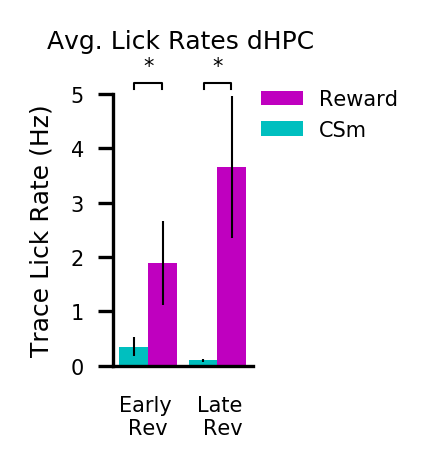

In [14]:
from matplotlib.patches import Patch
labels = ['Early \nRev','Late \nRev']
area = 'd'

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

to_plot = ['pre_rev','post_rev']

dark_co = ('forestgreen','darkcyan','firebrick','lightgrey','dimgrey','goldenrod')
fig, ax = pl.subplots(figsize=(.6,1.2))
pvs=[]

for day,i in zip(to_plot,range(2)):
    if i ==0:
        exec("%s_tc_%s_CSm = [x/2 for x in %s_tc_%s_CSm]"%(day,area,day,area))
        exec("e = np.array(sstats.sem(%s_tc_%s_CSm))"%(day,area))
        exec("ax.bar(i - width/2, np.mean(%s_tc_%s_CSm), width,color='c',yerr=e)"%(day,area))
        exec("%s_tc_%s_reward = [x/2 for x in %s_tc_%s_reward]"%(day,area,day,area))
        exec("l= np.array(sstats.sem(%s_tc_%s_reward))"%(day,area))
        exec("ax.bar(i + width/2,  np.mean(%s_tc_%s_reward), width,color='m',yerr=l)"%(day,area))
    else:
        exec("%s_tc_%s_CSm = [x/2 for x in %s_tc_%s_CSm]"%(day,area,day,area))
        exec("e = np.array(sstats.sem(%s_tc_%s_CSm))"%(day,area))
        exec("ax.bar(i-.4 - width/2, np.mean(%s_tc_%s_CSm), width, color='c',yerr=e)"%(day,area))
        exec("%s_tc_%s_reward = [x/2 for x in %s_tc_%s_reward]"%(day,area,day,area))
        exec("l= np.array(sstats.sem(%s_tc_%s_reward))"%(day,area))
        exec("ax.bar(i-.4 + width/2,  np.mean(%s_tc_%s_reward), width,color='m',yerr=l)"%(day,area))
        
for day in to_plot:
    if day =='pre_rev':
        exec("pvs.append(add_significance(ax, %s_tc_%s_CSm, %s_tc_%s_reward,-.12,0.12,5.2))"%(day,area,day,area))
    else:
        exec("pvs.append(add_significance(ax, %s_tc_%s_CSm, %s_tc_%s_reward,-.12+.6,0.12+.6,5.2))"%(day,area,day,area))
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Trace Lick Rate (Hz)',fontsize=6)
#ax.set_title('Decoding During CS')
ax.set_ylim(0,5)
x = [0,.65]
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='m'),Patch(facecolor='c')],['Reward','CSm'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)

        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Avg. Lick Rates dHPC',y=1.06,fontsize=6)

fig.savefig('../../../results/final-ish figures/%s_3odor_dorsal_mice_rev_trace_lick_bars.pdf'%NOTEBOOK_NAME)

In [160]:
from scipy.stats import sem
from matplotlib.lines import Line2D
def add_significance(ax, array1, array2, x1, x2, y, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y,)
    p = sig_func(array1, array2)[-1]
    print p
    sig_value = sig_func(array1, array2)[0]
    deltay = np.diff(ax.axis()[-2:])*ticksize
    line = Line2D([x1, x1, x2, x2], [y-deltay, y, y, y-deltay], lw=.5, color='k', clip_on=False)
    ax.add_line(line)
    ax.text(np.mean([x1, x2]), y+.15,
            'n.s.' if p > thresholds[0]/mcc else
            '*' if p > thresholds[1]/mcc else
            '**' if p > thresholds[2]/mcc else
            '***',
            ha='center', fontsize=4)
    return sig_value, p

0.000244870569321


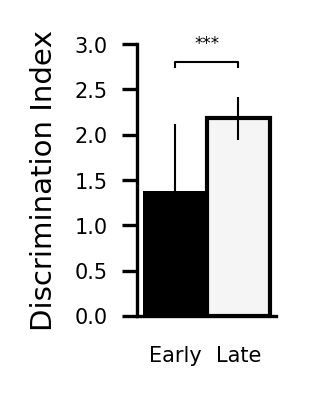

In [161]:
from matplotlib.patches import Patch
labels = ['Early','Late']
area = 't'

#x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars

to_plot = ['pre','post']

dark_co = ('forestgreen','darkcyan','firebrick','lightgrey','dimgrey','goldenrod')
fig, ax = pl.subplots(figsize=(.6,1.2))
pvs=[]

for day in to_plot:
    if day == 'pre':
        exec("e = np.array(np.std(%s_di_%s))"%(day,area))
        exec("ax.bar(0 + width/2, np.mean(%s_di_%s), width, color='k',yerr=e)"%(day,area))
    if day == 'post':
        exec("l = np.array(np.std(%s_di_%s))"%(day,area))
        exec("ax.bar(0 + width+width/2,  np.mean(%s_di_%s), width,color='whitesmoke', edgecolor='k',yerr=l)"%(day,area))
exec("pvs.append(add_significance(ax, pre_di_%s, post_di_%s,width/2,width+width/2,2.8))"%(area,area))
   
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Discrimination Index')
#ax.set_title('Decoding During CS')
ax.set_ylim(0,3)
x=[width/2,width/2+width]
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='x',bottom=False)

        #max(np.mean(mean_scores_gmin_tb_6Discrimination_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
#pl.suptitle('Discrimination Index',y=1.06,fontsize=8)
fig.savefig('../../../results/final-ish figures/%s_3odor_all_mice_di_bars.pdf'%NOTEBOOK_NAME)


0.00419772498866


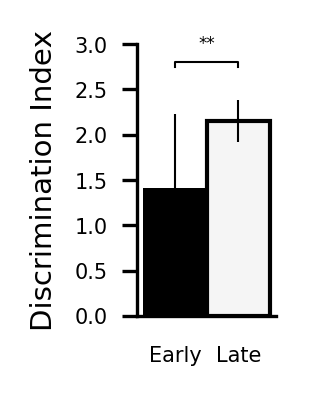

In [162]:
from matplotlib.patches import Patch
labels = ['Early','Late']
area = 'v'

#x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars

to_plot = ['pre','post']

dark_co = ('forestgreen','darkcyan','firebrick','lightgrey','dimgrey','goldenrod')
fig, ax = pl.subplots(figsize=(.6,1.2))
pvs=[]

for day in to_plot:
    if day == 'pre':
        exec("e = np.array(np.std(%s_di_%s))"%(day,area))
        exec("ax.bar(0 + width/2, np.mean(%s_di_%s), width, color='k',yerr=e)"%(day,area))
    if day == 'post':
        exec("l = np.array(np.std(%s_di_%s))"%(day,area))
        exec("ax.bar(0 + width+width/2,  np.mean(%s_di_%s), width,color='whitesmoke', edgecolor='k',yerr=l)"%(day,area))
exec("pvs.append(add_significance(ax, pre_di_%s, post_di_%s,width/2,width+width/2,2.8))"%(area,area))
   
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Discrimination Index')
#ax.set_title('Decoding During CS')
ax.set_ylim(0,3)
x=[width/2,width/2+width]
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='x',bottom=False)

        #max(np.mean(mean_scores_gmin_tb_6Discrimination_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
#pl.suptitle('Discrimination Index',y=1.06,fontsize=8)

fig.savefig('../../../results/final-ish figures/%s_3odor_ventral_mice_di_bars.pdf'%NOTEBOOK_NAME)

0.040427799185


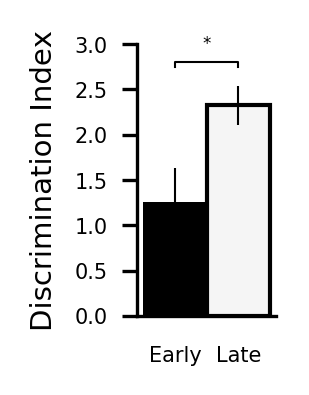

In [163]:
from matplotlib.patches import Patch
labels = ['Early','Late']
area = 'd'

#x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars

to_plot = ['pre','post']

dark_co = ('forestgreen','darkcyan','firebrick','lightgrey','dimgrey','goldenrod')
fig, ax = pl.subplots(figsize=(.6,1.2))
pvs=[]

for day in to_plot:
    if day == 'pre':
        exec("e = np.array(np.std(%s_di_%s))"%(day,area))
        exec("ax.bar(0 + width/2, np.mean(%s_di_%s), width, color='k',yerr=e)"%(day,area))
    if day == 'post':
        exec("l = np.array(np.std(%s_di_%s))"%(day,area))
        exec("ax.bar(0 + width+width/2,  np.mean(%s_di_%s), width,color='whitesmoke', edgecolor='k',yerr=l)"%(day,area))
exec("pvs.append(add_significance(ax, pre_di_%s, post_di_%s,width/2,width+width/2,2.8))"%(area,area))
   
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Discrimination Index')
#ax.set_title('Decoding During CS')
ax.set_ylim(0,3)
x=[width/2,width/2+width]
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='x',bottom=False)

        #max(np.mean(mean_scores_gmin_tb_6Discrimination_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
#pl.suptitle('Discrimination Index',y=1.06,fontsize=8)
fig.savefig('../../../results/final-ish figures/%s_3odor_dorsal_mice_di_bars.pdf'%NOTEBOOK_NAME)

In [164]:
save_workspace(db)

Could not store variable 'di'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'sys'. Skipping...
